In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
 
X = data
y = target

In [2]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=10)


In [3]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
y_pred= model.predict(X_test)
y_train_pred = model.predict(X_train)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

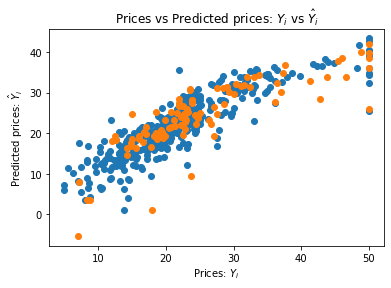

In [6]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [7]:
print(mean_squared_error(y_test,y_pred))

34.41396845313848


In [8]:
model.score(X_test,y_test)

0.6709339839115637

In [9]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)

In [10]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_trans = scaler.transform(X_train)
# X_test_trans= scaler.transform(X_test)

X_train_trans = polynomial_features.fit_transform(X_train)
X_test_trans = polynomial_features.transform(X_test)



modelPoly = LinearRegression()
modelPoly.fit(X_train_trans, y_train)
y_pred_poly = modelPoly.predict(X_test_trans)
y_pred_train_poly = modelPoly.predict(X_train_trans)


In [11]:
modelPoly.score(X_test_trans,y_test)

0.8715047031568678

In [12]:
print(mean_squared_error(y_test,y_pred_poly))
print(mean_squared_error(y_train,y_pred_train_poly))

13.438133613736024
5.270851219857094


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

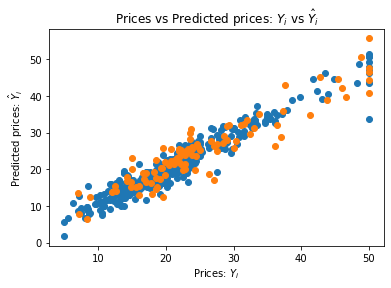

In [13]:
plt.scatter(y_train, y_pred_train_poly)
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

LASSO


In [14]:
from sklearn.linear_model import Lasso

# dla alphy = 0.01
model = Lasso(alpha=0.01)
model.fit(X_train_trans,y_train)
y_pred_lasso = model.predict(X_test_trans)
y_pred_train_lasso = model.predict(X_train_trans)
mse = mean_squared_error(y_test,y_pred_lasso)
mseTrain = mean_squared_error(y_train,y_pred_train_lasso)
score = model.score(X_test_trans,y_test)

print(f"Dla alphy = 0.01:  mse = {mse},  model.score = {score} ")





Dla alphy = 0.01:  mse = 12.425974564668754,  model.score = 0.8811829576824383 


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+00, tolerance: 3.109e+00
  model = cd_fast.enet_coordinate_descent(


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.297e+02, tolerance: 3.109e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.144e+00, tolerance: 3.109e+00
  model = cd_fast.enet_coordinate_descent(


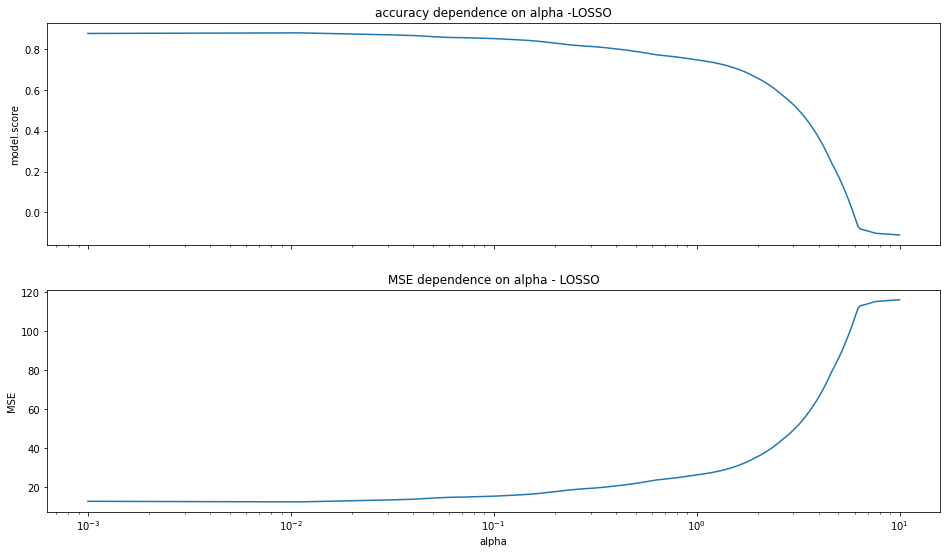

In [15]:
alphaTab = np.linspace(0.001, 10,1000)
scoreTab = []
scoreTrainTab =[]
mseTab = []
for alpha in alphaTab:
    model = Lasso(alpha=alpha)
    model.fit(X_train_trans,y_train)
    y_pred_lasso = model.predict(X_test_trans)
    mse = mean_squared_error(y_test,y_pred_lasso)
    score = model.score(X_test_trans,y_test)
    scoreTrain = model.score(X_train_trans,y_train)
    scoreTrainTab.append(scoreTrain)
    scoreTab.append(score)
    mseTab.append(mse)

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
fig.set_size_inches(16,9)
ax1.plot(alphaTab, scoreTab)
#ax1.plot(alphaTab,scoreTrainTab)
ax1.set_title("accuracy dependence on alpha -LOSSO")
ax1.set_ylabel('model.score')
ax1.set_xscale('log')
ax2.plot(alphaTab, mseTab)
ax2.set_title("MSE dependence on alpha - LOSSO")
ax2.set_ylabel('MSE')
ax2.set_xlabel('alpha')
ax2.set_xscale('log')


RIDGE

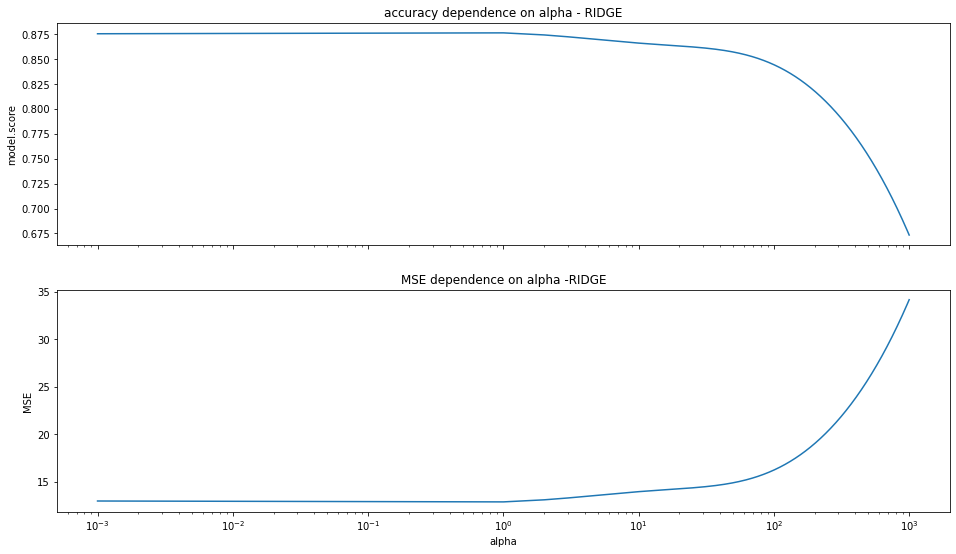

In [16]:
from sklearn.linear_model import Ridge

alphaTab = np.linspace(0.001, 1000,1000)
scoreTab = []
mseTab = []
for alpha in alphaTab:
    model = Ridge(alpha=alpha)
    model.fit(X_train_trans,y_train)
    y_pred_lasso = model.predict(X_test_trans)
    mse = mean_squared_error(y_test,y_pred_lasso)
    score = model.score(X_test_trans,y_test)
    scoreTab.append(score)
    mseTab.append(mse)

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
fig.set_size_inches(16,9)
ax1.plot(alphaTab, scoreTab)
ax1.set_title("accuracy dependence on alpha - RIDGE")
ax1.set_ylabel('model.score')
ax1.set_xscale('log')
ax2.plot(alphaTab, mseTab)
ax2.set_title("MSE dependence on alpha -RIDGE")
ax2.set_ylabel('MSE')
ax2.set_xlabel('alpha')
ax2.set_xscale('log')



Regularyzacja dla Regresji Logistycznej

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=10)
regularized_lr=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
regularized_lr.fit(X_train,y_train)
y_pred=regularized_lr.predict(X_test)
regularized_lr.score(X_test,y_test)

0.956140350877193

c:\Users\DELL\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\DELL\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


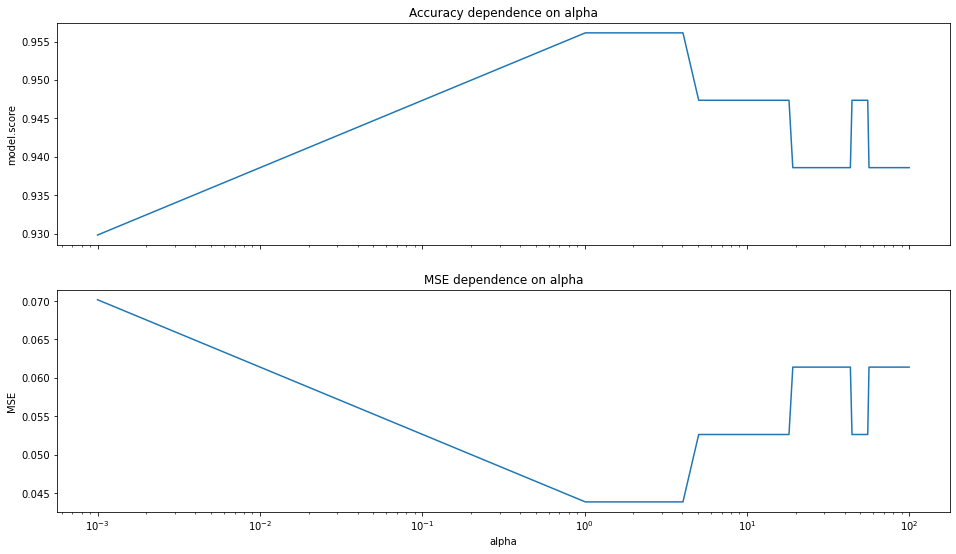

In [22]:
cList= np.linspace(0.001, 100.0, num=100)
accuracyList = []
mseList =[]
for c in cList:
    regularized_lr=LogisticRegression(penalty='l2',C=c,solver='newton-cg',max_iter=200)
    regularized_lr.fit(X_train,y_train)
    y_pred=regularized_lr.predict(X_test)
    accuracy = regularized_lr.score(X_test,y_test)
    mse = mean_squared_error(y_test,y_pred)
    accuracyList.append(accuracy)
    mseList.append(mse)


fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
fig.set_size_inches(16,9)
ax1.plot(cList, accuracyList)
ax1.set_title("Accuracy dependence on alpha")
ax1.set_ylabel('accuracy')
ax1.set_xscale('log')
ax2.plot(cList, mseList)
ax2.set_title("MSE dependence on alpha")
ax2.set_ylabel('MSE')
ax2.set_xlabel('alpha')
ax2.set_xscale('log')